# Visualizing DESI spectra

In [11]:
# import sys
import os
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

# SPARCL imports
from sparcl.client import SparclClient

import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from specutils import Spectrum1D
from astropy.nddata import InverseVariance
from astropy.convolution import convolve, Gaussian1DKernel
from astropy.io import fits
from astropy.coordinates import SkyCoord
# %matplotlib inline

# Data Lab imports
from dl import queryClient as qc
from dl import authClient as ac
from getpass import getpass

# import utils

# plots default setup
font = 12
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # ou Helvetica se estiver instalada
    'text.usetex': True,
    'font.size': font,
    'axes.titlesize': font,
    'axes.labelsize': font,
    'xtick.labelsize': font,
    'ytick.labelsize': font,
    'legend.fontsize': font,
    'figure.titlesize': font,
    'font.sans-serif': ['Helvetica'],
    'figure.figsize': (16, 6)
})



In [2]:
client = SparclClient()

In the `cons`, you can define the position limits for your sample and choose from which survey.

In [3]:
out = ['sparcl_id', 'ra', 'dec', 'redshift', 'spectype', 'objtype', 'data_release', 'desiname', 'zcat_nspec', 'targetid']
cons = {'spectype': ['GALAXY'],
        'redshift':[0.01, 0.02],
        'ra': [29.29, 29.3],
        'dec': [-6.7, -6.69],
        'data_release': ['DESI-DR1']}

In [4]:
found_I = client.find(outfields=out, constraints=cons, limit=None)
df_found = pd.json_normalize(found_I.records)
df_found.head()

,redshift,dec,data_release,spectype,ra,sparcl_id,targetid,_dr
0,0.01836,-6.697562,DESI-DR1,GALAXY,29.291129,0d7567f6-86a4-11ef-820e-525400f334e1,39627622426088385,DESI-DR1


In [5]:
# Define the fields to include in the retrieve function
inc = ['sparcl_id', 'specid', 'targetid', 'data_release', 'redshift', 'flux',
       'wavelength', 'model', 'ivar', 'mask', 'wave_sigma', 'spectype', 'ra', 'dec']

Here you retrive the data based on the previus search

In [6]:
ids_I = found_I.ids
results_I = client.retrieve(uuid_list=ids_I, include=inc, limit=None, dataset_list = ['DESI-DR1'])
results_I.info

{'status': {'success': True,
  'info': ["Successfully found 1 records in dr_list=['DESI-DR1']"],
  'warnings': []}}

In [7]:
results_desi_dr1 = pd.json_normalize(results_I.records)

In [8]:
def plot_spec(result):

    """
    Plot the spectrum of a single DESI target.

    Parameters
    ----------
    result : object
        A single record from a SPARCL query, containing the spectrum,
        model, and metadata for the target.

    Returns
    -------
    None

    Notes
    -----
    This function will overwrite any existing plot.  If you want to
    create multiple plots, you should use subplots or create a new figure
    before calling this function.

    """

    sparcl_id       = result.sparcl_id
    data_release    = result.data_release
    flux            = result.flux
    wavelength      = result.wavelength
    model           = result.model
    spectype        = result.spectype
    redshift        = result.redshift
    ra              = result.ra
    dec             = result.dec

    plt.title(f"Data Set = {data_release}\n"
              f"Type = {spectype}\n"
              f"ID = {sparcl_id}\n"
              f"Redshift = {redshift}\n"
              f"RA = {ra}\n"
              f"Dec = {dec}", loc='left')
    plt.xlabel('wavelength $[\AA]$')
    plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')
    
    # Plot unsmoothed spectrum in grey
    plt.plot(wavelength, flux, color='k', alpha=0.6, label='Observed spectrum')
   

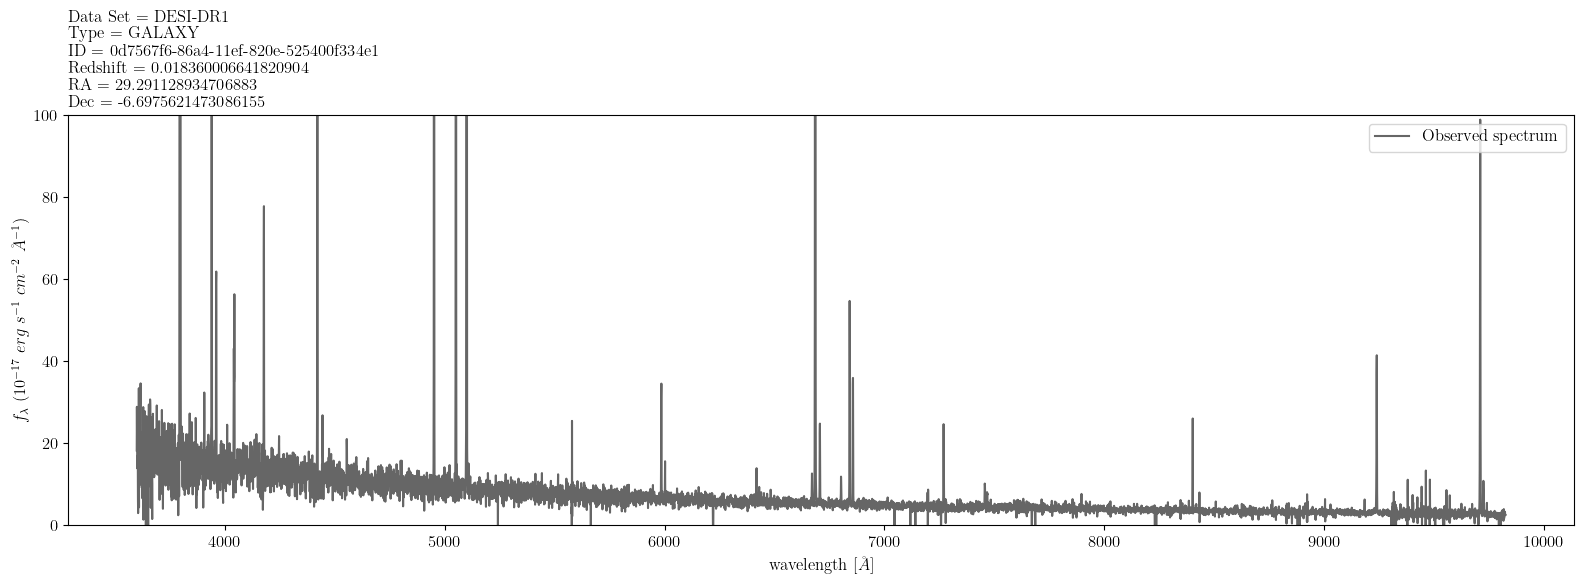

In [23]:
for obj in results_desi_dr1.itertuples():
    fig = plt.figure()
    plot_spec(obj)

    plt.ylim(0,100)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.close(fig)


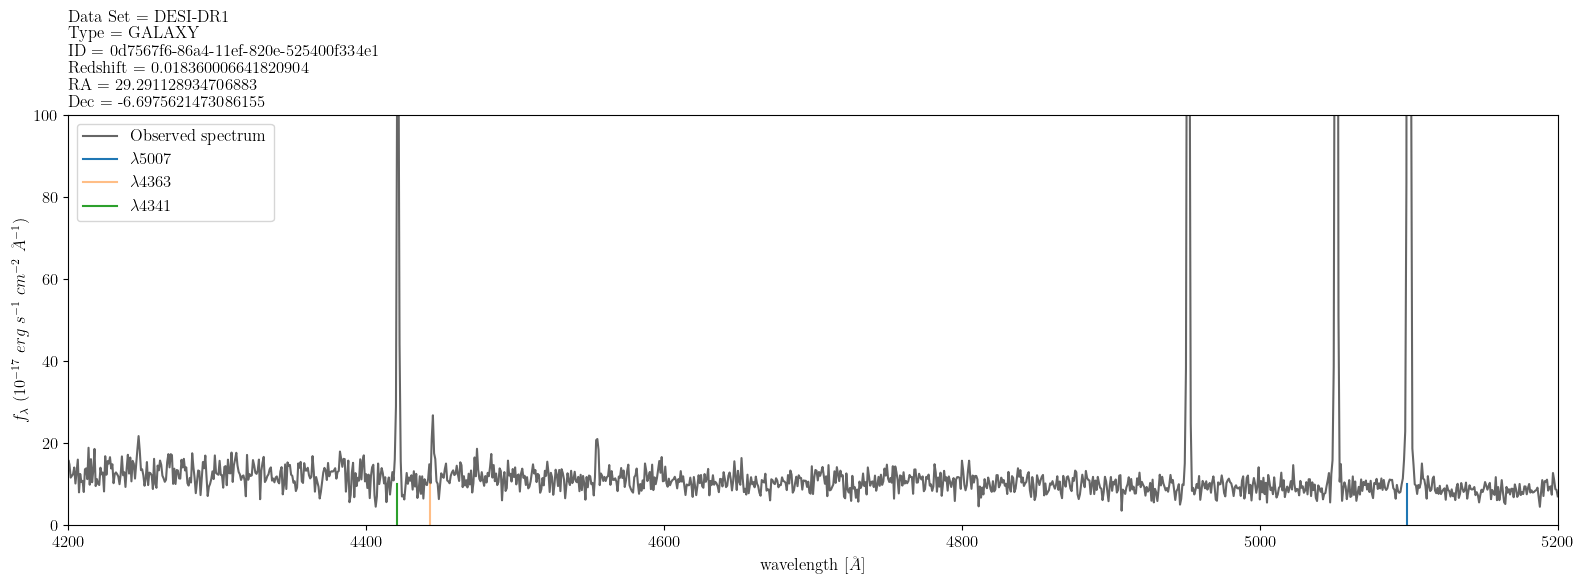

In [22]:
for obj in results_desi_dr1.itertuples():
    plot_spec(obj)

    x = 5007*(float(obj.redshift)+1)
    y = 4363*(float(obj.redshift)+1)
    y0 = 4341*(float(obj.redshift)+1)

    plt.plot([x,x], [-10,10], label=r'$\lambda$5007')
    plt.plot([y,y], [-10,10], alpha=0.5, label=r'$\lambda$4363')
    plt.plot([y0,y0], [-10,10], label=r'$\lambda$4341')

    plt.xlim(4200, 5200)
    plt.ylim(0,100)

    plt.legend()
    plt.tight_layout()
